# UFC FIGHT DATA ANALYSIS

In [33]:
import pandas as pd #helpful for manipulation of data
import numpy as np #deal with multidimensional error
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import seaborn as sns #it is a visualization library

In [34]:
#extract fight type
def fight_type(X):
  weight_classes = ['Women\'s Strawweight', 'Women\'s Bantamweight', 
                  'Women\'s Featherweight', 'Women\'s Flyweight', 'Lightweight', 
                  'Welterweight', 'Middleweight','Light Heavyweight', 
                  'Heavyweight', 'Featherweight','Bantamweight', 'Flyweight', 'Open Weight']
  for Division in weight_classes:
        if Division in X:
            return Division
        if X == 'Catch Weight Bout' or 'Catchweight Bout':
            return 'Catch Weight'
        else:
            return 'Open Weight'

#determine age
def get_age(row):
    B_age = (row['date_year'] - row['B_year'])
    R_age = (row['date_year'] - row['R_year'])
    if np.isnan(B_age)!=True:
        B_age = B_age
    if np.isnan(R_age)!=True:
        R_age = R_age
    return pd.Series([B_age, R_age], index=['B_age', 'R_age'])

#determine number of rounds
def get_rounds(X):
    if X == 'No Time Limit':
        return 1
    else:
        return len(X.split('(')[1].replace(')', '').split('-'))

#change winer name to B or R, if NaN => Draw
def get_renamed_winner(row):
    if row['R_fighter'] == row['Winner']:
        return 'Red'
    elif row['B_fighter'] == row['Winner']:
        return 'Blue'
    elif row['Winner'] == 'Draw':
        return 'Draw'

In [35]:
fighter_details = pd.read_csv('raw_fighter_details.csv')
fights_data = pd.read_csv('raw_total_fight_data.csv', sep=';')


In [36]:
fighter_details.head()


,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [38]:
fighter_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fighter_name  3313 non-null   object
 1   Height        3050 non-null   object
 2   Weight        3238 non-null   object
 3   Reach         1569 non-null   object
 4   Stance        2439 non-null   object
 5   DOB           2573 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


In [6]:
#fighter_details['Height'] = fighter_details['Height'].apply(to_cm)
#fighter_details['Reach'] = fighter_details['Reach'].apply(to_cm)
#fighter_details['Weight'] = fighter_details['Weight'].apply(to_kg)
#fighter_details['DOB'] = pd.to_datetime(fighter_details['DOB'])

In [39]:
fighter_details.tail()

,fighter_name,Height,Weight,Reach,Stance,DOB
3308,Zelim Imadaev,"6' 0""",170 lbs.,"76""",Orthodox,"Jan 25, 1995"
3309,Zhang Lipeng,"5' 11""",155 lbs.,"71""",Southpaw,"Mar 10, 1990"
3310,Zoila Frausto,"5' 4""",135 lbs.,NaN,Orthodox,NaN
3311,Zu Anyanwu,"6' 1""",251 lbs.,"77""",Orthodox,"Aug 05, 1981"
3312,Zubaira Tukhugov,"5' 8""",145 lbs.,"68""",Orthodox,"Jan 15, 1991"


In [40]:
fights_data.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,...,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,...,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,...,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,...,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,...,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [41]:
fights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   R_fighter        5144 non-null   object
 1   B_fighter        5144 non-null   object
 2   R_KD             5144 non-null   int64 
 3   B_KD             5144 non-null   int64 
 4   R_SIG_STR.       5144 non-null   object
 5   B_SIG_STR.       5144 non-null   object
 6   R_SIG_STR_pct    5144 non-null   object
 7   B_SIG_STR_pct    5144 non-null   object
 8   R_TOTAL_STR.     5144 non-null   object
 9   B_TOTAL_STR.     5144 non-null   object
 10  R_TD             5144 non-null   object
 11  B_TD             5144 non-null   object
 12  R_TD_pct         5144 non-null   object
 13  B_TD_pct         5144 non-null   object
 14  R_SUB_ATT        5144 non-null   int64 
 15  B_SUB_ATT        5144 non-null   int64 
 16  R_PASS           5144 non-null   int64 
 17  B_PASS           5144 non-null   

In [42]:
fights_data['Fight_type'].value_counts()

Lightweight Bout                                                        947
Welterweight Bout                                                       915
Middleweight Bout                                                       684
Light Heavyweight Bout                                                  453
Heavyweight Bout                                                        453
                                                                       ... 
Ultimate Fighter 28 Heavyweight Tournament Title Bout                     1
Ultimate Fighter 1 Light Heavyweight Tournament Title Bout                1
Ultimate Fighter 8 Light Heavyweight Tournament Title Bout                1
Ultimate Japan Heavyweight Tournament Title Bout                          1
Ultimate Fighter Australia vs. UK Welterweight Tournament Title Bout      1
Name: Fight_type, Length: 112, dtype: int64

In [43]:
fights_data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner'],
      dtype='object')>

In [44]:
# split attempted strikes and landed strikes
cols = ['R_SIG_STR.', 'B_SIG_STR.', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_HEAD', 'B_HEAD', 'R_BODY','B_BODY', 'R_LEG', 'B_LEG', 
        'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH','B_CLINCH', 'R_GROUND', 'B_GROUND']

attemp = '_attempted'
landed = '_landed'

for col in cols:
    fights_data[col+attemp] = fights_data[col].apply(lambda X: int(X.split('of')[1]))
    fights_data[col+landed] = fights_data[col].apply(lambda X: int(X.split('of')[0]))
    
fights_data.drop(cols, axis=1, inplace=True)
fights_data.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,B_DISTANCE_attempted,B_DISTANCE_landed,R_CLINCH_attempted,R_CLINCH_landed,B_CLINCH_attempted,B_CLINCH_landed,R_GROUND_attempted,R_GROUND_landed,B_GROUND_attempted,B_GROUND_landed
0,Henry Cejudo,Marlon Moraes,0,0,52%,47%,25%,0%,1,0,...,116,54,23,19,2,2,30,26,1,1
1,Valentina Shevchenko,Jessica Eye,1,0,72%,16%,100%,0%,1,0,...,12,2,2,2,0,0,1,1,0,0
2,Tony Ferguson,Donald Cerrone,0,0,52%,36%,0%,100%,0,0,...,184,68,2,1,1,0,0,0,0,0
3,Jimmie Rivera,Petr Yan,0,2,38%,29%,0%,33%,0,0,...,167,42,15,9,12,10,4,4,10,4
4,Tai Tuivasa,Blagoy Ivanov,0,1,44%,59%,0%,100%,0,0,...,111,62,18,14,6,5,0,0,6,6


In [45]:
fights_data.tail()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,B_DISTANCE_attempted,B_DISTANCE_landed,R_CLINCH_attempted,R_CLINCH_landed,B_CLINCH_attempted,B_CLINCH_landed,R_GROUND_attempted,R_GROUND_landed,B_GROUND_attempted,B_GROUND_landed
5139,Gerard Gordeau,Kevin Rosier,1,0,64%,0%,0%,0%,0,0,...,3,0,0,0,0,0,9,6,0,0
5140,Ken Shamrock,Patrick Smith,0,0,100%,50%,50%,0%,2,0,...,1,1,0,0,1,1,1,1,6,2
5141,Royce Gracie,Art Jimmerson,0,0,0%,0%,100%,0%,0,0,...,0,0,0,0,0,0,0,0,0,0
5142,Kevin Rosier,Zane Frazier,2,0,55%,42%,0%,0%,0,0,...,7,0,9,4,19,10,8,7,2,2
5143,Gerard Gordeau,Teila Tuli,0,0,60%,0%,0%,0%,0,0,...,1,0,0,0,0,0,2,2,0,0


In [46]:
# percentages to fractions

cols = ['R_SIG_STR_pct','B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']

for col in cols:
    fights_data[col] = fights_data[col].apply(lambda X: float(X.replace('%', ''))/100)

fights_data.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,B_DISTANCE_attempted,B_DISTANCE_landed,R_CLINCH_attempted,R_CLINCH_landed,B_CLINCH_attempted,B_CLINCH_landed,R_GROUND_attempted,R_GROUND_landed,B_GROUND_attempted,B_GROUND_landed
0,Henry Cejudo,Marlon Moraes,0,0,0.52,0.47,0.25,0.00,1,0,...,116,54,23,19,2,2,30,26,1,1
1,Valentina Shevchenko,Jessica Eye,1,0,0.72,0.16,1.00,0.00,1,0,...,12,2,2,2,0,0,1,1,0,0
2,Tony Ferguson,Donald Cerrone,0,0,0.52,0.36,0.00,1.00,0,0,...,184,68,2,1,1,0,0,0,0,0
3,Jimmie Rivera,Petr Yan,0,2,0.38,0.29,0.00,0.33,0,0,...,167,42,15,9,12,10,4,4,10,4
4,Tai Tuivasa,Blagoy Ivanov,0,1,0.44,0.59,0.00,1.00,0,0,...,111,62,18,14,6,5,0,0,6,6


In [47]:
fights_data['Fight_type'].value_counts()


Lightweight Bout                                                        947
Welterweight Bout                                                       915
Middleweight Bout                                                       684
Light Heavyweight Bout                                                  453
Heavyweight Bout                                                        453
                                                                       ... 
Ultimate Fighter 28 Heavyweight Tournament Title Bout                     1
Ultimate Fighter 1 Light Heavyweight Tournament Title Bout                1
Ultimate Fighter 8 Light Heavyweight Tournament Title Bout                1
Ultimate Japan Heavyweight Tournament Title Bout                          1
Ultimate Fighter Australia vs. UK Welterweight Tournament Title Bout      1
Name: Fight_type, Length: 112, dtype: int64

In [48]:
fights_data['Fight_type'] = fights_data['Fight_type'].apply(fight_type)
fights_data['Fight_type'].value_counts()

Catch Weight           5001
Women's Strawweight     143
Name: Fight_type, dtype: int64

In [49]:
fights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               5144 non-null   object 
 1   B_fighter               5144 non-null   object 
 2   R_KD                    5144 non-null   int64  
 3   B_KD                    5144 non-null   int64  
 4   R_SIG_STR_pct           5144 non-null   float64
 5   B_SIG_STR_pct           5144 non-null   float64
 6   R_TD_pct                5144 non-null   float64
 7   B_TD_pct                5144 non-null   float64
 8   R_SUB_ATT               5144 non-null   int64  
 9   B_SUB_ATT               5144 non-null   int64  
 10  R_PASS                  5144 non-null   int64  
 11  B_PASS                  5144 non-null   int64  
 12  R_REV                   5144 non-null   int64  
 13  B_REV                   5144 non-null   int64  
 14  win_by                  5144 non-null   

In [50]:
fights_data['Winner'].isnull().sum() #5144 - 5061 #ITS SHOWS THAT HOW MANY NULL VALUE ARE THERE IN THIS BY SUM 

83

In [66]:
fights_data['Winner'].fillna('Draw', inplace=True) #fill the null value with draw INPLACE=TRUE MEANS THAT IT WILL MAKE CHANGE AND DOESNOT RETURN ANY COPY

In [52]:
fights_data['Winner'] = fights_data[['R_fighter', 'B_fighter', 'Winner']].apply(get_renamed_winner, axis=1) #apply is used to make changes
fights_data['Winner'].value_counts()

Red     3470
Blue    1591
Draw      83
Name: Winner, dtype: int64

In [53]:
df = fights_data.merge(fighter_details, left_on='R_fighter', right_on='fighter_name', how='left')
df.drop('fighter_name', axis=1, inplace=True)
df.rename(columns={'Height':'R_Height',
                          'Weight':'R_Weight',
                          'Reach':'R_Reach',
                          'Stance':'R_Stance',
                          'DOB':'R_DOB'}, 
                 inplace=True)

In [54]:
df = df.merge(fighter_details, left_on='B_fighter', right_on='fighter_name', how='left')
df.drop('fighter_name', axis=1, inplace=True)
df.rename(columns={'Height':'B_Height',
                          'Weight':'B_Weight',
                          'Reach':'B_Reach',
                          'Stance':'B_Stance',
                          'DOB':'B_DOB'}, 
                 inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5144 entries, 0 to 5143
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               5144 non-null   object 
 1   B_fighter               5144 non-null   object 
 2   R_KD                    5144 non-null   int64  
 3   B_KD                    5144 non-null   int64  
 4   R_SIG_STR_pct           5144 non-null   float64
 5   B_SIG_STR_pct           5144 non-null   float64
 6   R_TD_pct                5144 non-null   float64
 7   B_TD_pct                5144 non-null   float64
 8   R_SUB_ATT               5144 non-null   int64  
 9   B_SUB_ATT               5144 non-null   int64  
 10  R_PASS                  5144 non-null   int64  
 11  B_PASS                  5144 non-null   int64  
 12  R_REV                   5144 non-null   int64  
 13  B_REV                   5144 non-null   int64  
 14  win_by                  5144 non-null   

In [56]:
df['R_DOB'] = pd.to_datetime(df['R_DOB'])
df['B_DOB'] = pd.to_datetime(df['B_DOB'])
df['date'] = pd.to_datetime(df['date'])

In [57]:
df['R_year'] = df['R_DOB'].apply(lambda x: x.year)
df['B_year'] = df['B_DOB'].apply(lambda x: x.year)
df['date_year'] = df['date'].apply(lambda x: x.year)
df[['B_age', 'R_age']]= df[['date_year', 'R_year', 'B_year']].apply(get_age, axis=1)
df.drop(['R_DOB', 'B_DOB','date_year','R_year','B_year'], axis=1, inplace=True)

In [58]:
df['country'] = df['location'].apply(lambda x : x.split(',')[-1])

In [59]:
from plotly.io import write_image
values = df.Winner.value_counts()
labels = values.index
colors = ['red', 'blue', 'green']
trace = go.Pie(labels=labels, 
               values=values,
                marker=dict(colors=colors) 
              )
layout = go.Layout(title='Winner Distribution BY PIE CHART')
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
# fig.write_image("fig1.jpeg")

In [60]:
df['R_age'] = df['R_age'].fillna(df['R_age'].median())
df['B_age'] = df['B_age'].fillna(df['B_age'].median())

# TO CHECK THE YOUNGEST AND OLDEST FIGHTER

In [61]:
df_rage = df[['R_fighter','R_age']].copy()
df_rage = df_rage.rename(columns={'R_fighter' : 'fighter', 'R_age' : 'age'})
df_bage = df[['B_fighter', 'B_age']].copy()
df_bage = df_bage.rename(columns={'B_fighter' : 'fighter', 'B_age' : 'age'})
df_aux = df_rage.append(df_bage, sort=False, ignore_index=True)
df_aux.drop_duplicates(subset='fighter', keep='first', inplace=True)

print("oldest fighter: ",df_aux.groupby('age').max().tail(1))
print("youngest fighter: ",df_aux.groupby('age').min().head(1))


oldest fighter:              fighter
age                
51.0  Ron van Clief
youngest fighter:               fighter
age                 
19.0  Sean Daugherty


In [62]:
df['year'] = df['date'].apply(lambda x : int(str(x).split('-')[0]))

In [63]:
values = df['year'].value_counts().sort_values(ascending=False)
clrs = ['b' if (x < max(values)) else 'r' for x in values ]

# THE AGE OF R_FIGHTER AND B_FIGHTER

<Figure size 720x1152 with 0 Axes>

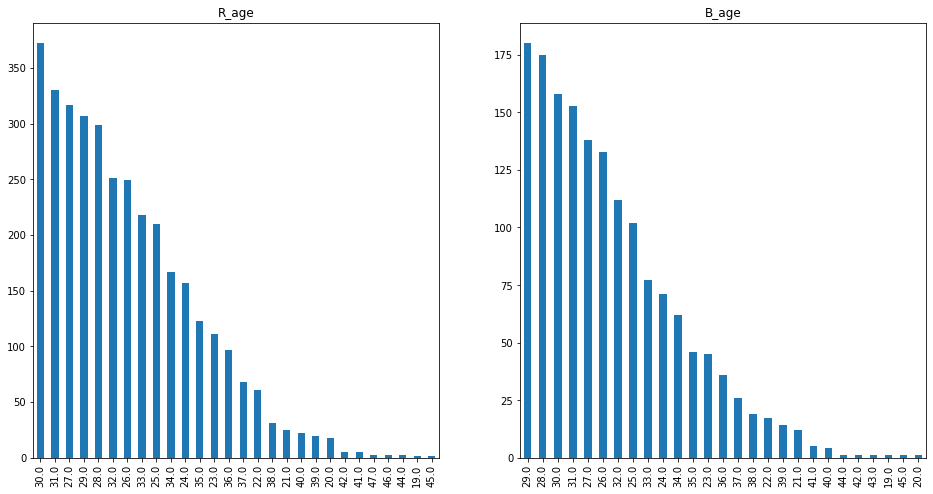

In [64]:
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(10,16))
f,ax=plt.subplots(1,2,figsize=(16,8))
df[df['Winner']=='Red']['R_age'].value_counts().plot.bar(ax=ax[0])

ax[0].set_title('R_age')
ax[0].set_ylabel('')
bar = df[df['Winner']=='Blue']['B_age'].value_counts().plot.bar(ax=ax[1])

ax[1].set_title('B_age')
plt.savefig('winners_age.png', dpi=300)
plt.show()

# FIGHT WIN BY :

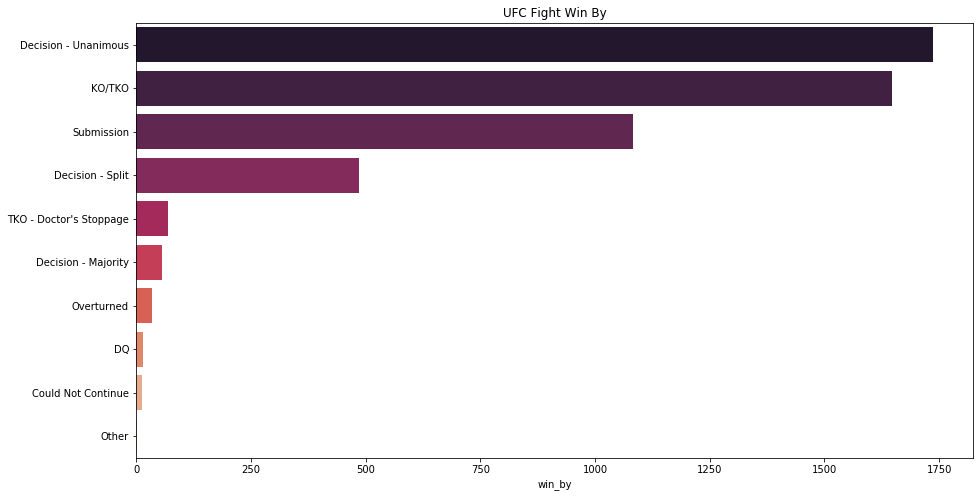

In [65]:
values = df['win_by'].value_counts()
labels = values.index

plt.figure(figsize=(15,8))

sns.barplot(x=values,y=labels, palette='rocket')

plt.title('UFC Fight Win By')
plt.savefig('winby.png', dpi=300)

plt.show()